In [1]:
import os
import sys

import numpy as np
import pandas as pd

import scipy as sp
from scipy.stats import norm
from scipy.interpolate import griddata
from scipy.special import erf
from scipy.odr import ODR, Model, RealData

from astropy.coordinates import SkyCoord

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator

import getdist
from getdist import plots, MCSamples

from loess.loess_2d import loess_2d

# ROOT_PATH = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0'
from dotenv import load_dotenv
load_dotenv()

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)
from main_code.utils.constants import *
from main_code.utils.functions import *
from main_code.utils.CosmoFunc import *

from scipy.stats import norm

# Plot configurations
GOLDEN_RATIO = 0.5*(1+np.sqrt(5))
FIGURE_HEIGHT = 5
FIGURE_WIDTH = FIGURE_HEIGHT*GOLDEN_RATIO
DEFAULT_FIGSIZE = (FIGURE_WIDTH, FIGURE_HEIGHT)


SMIN_SETTING = int(os.environ.get('SMIN_SETTING'))
COMPLETENESS_SETTING = int(os.environ.get('COMPLETENESS_SETTING'))

# Mock 1

0 14.0
Removed no burn in
1 13.5
Removed no burn in
2 13.0
Removed no burn in
3 12.5
Removed no burn in


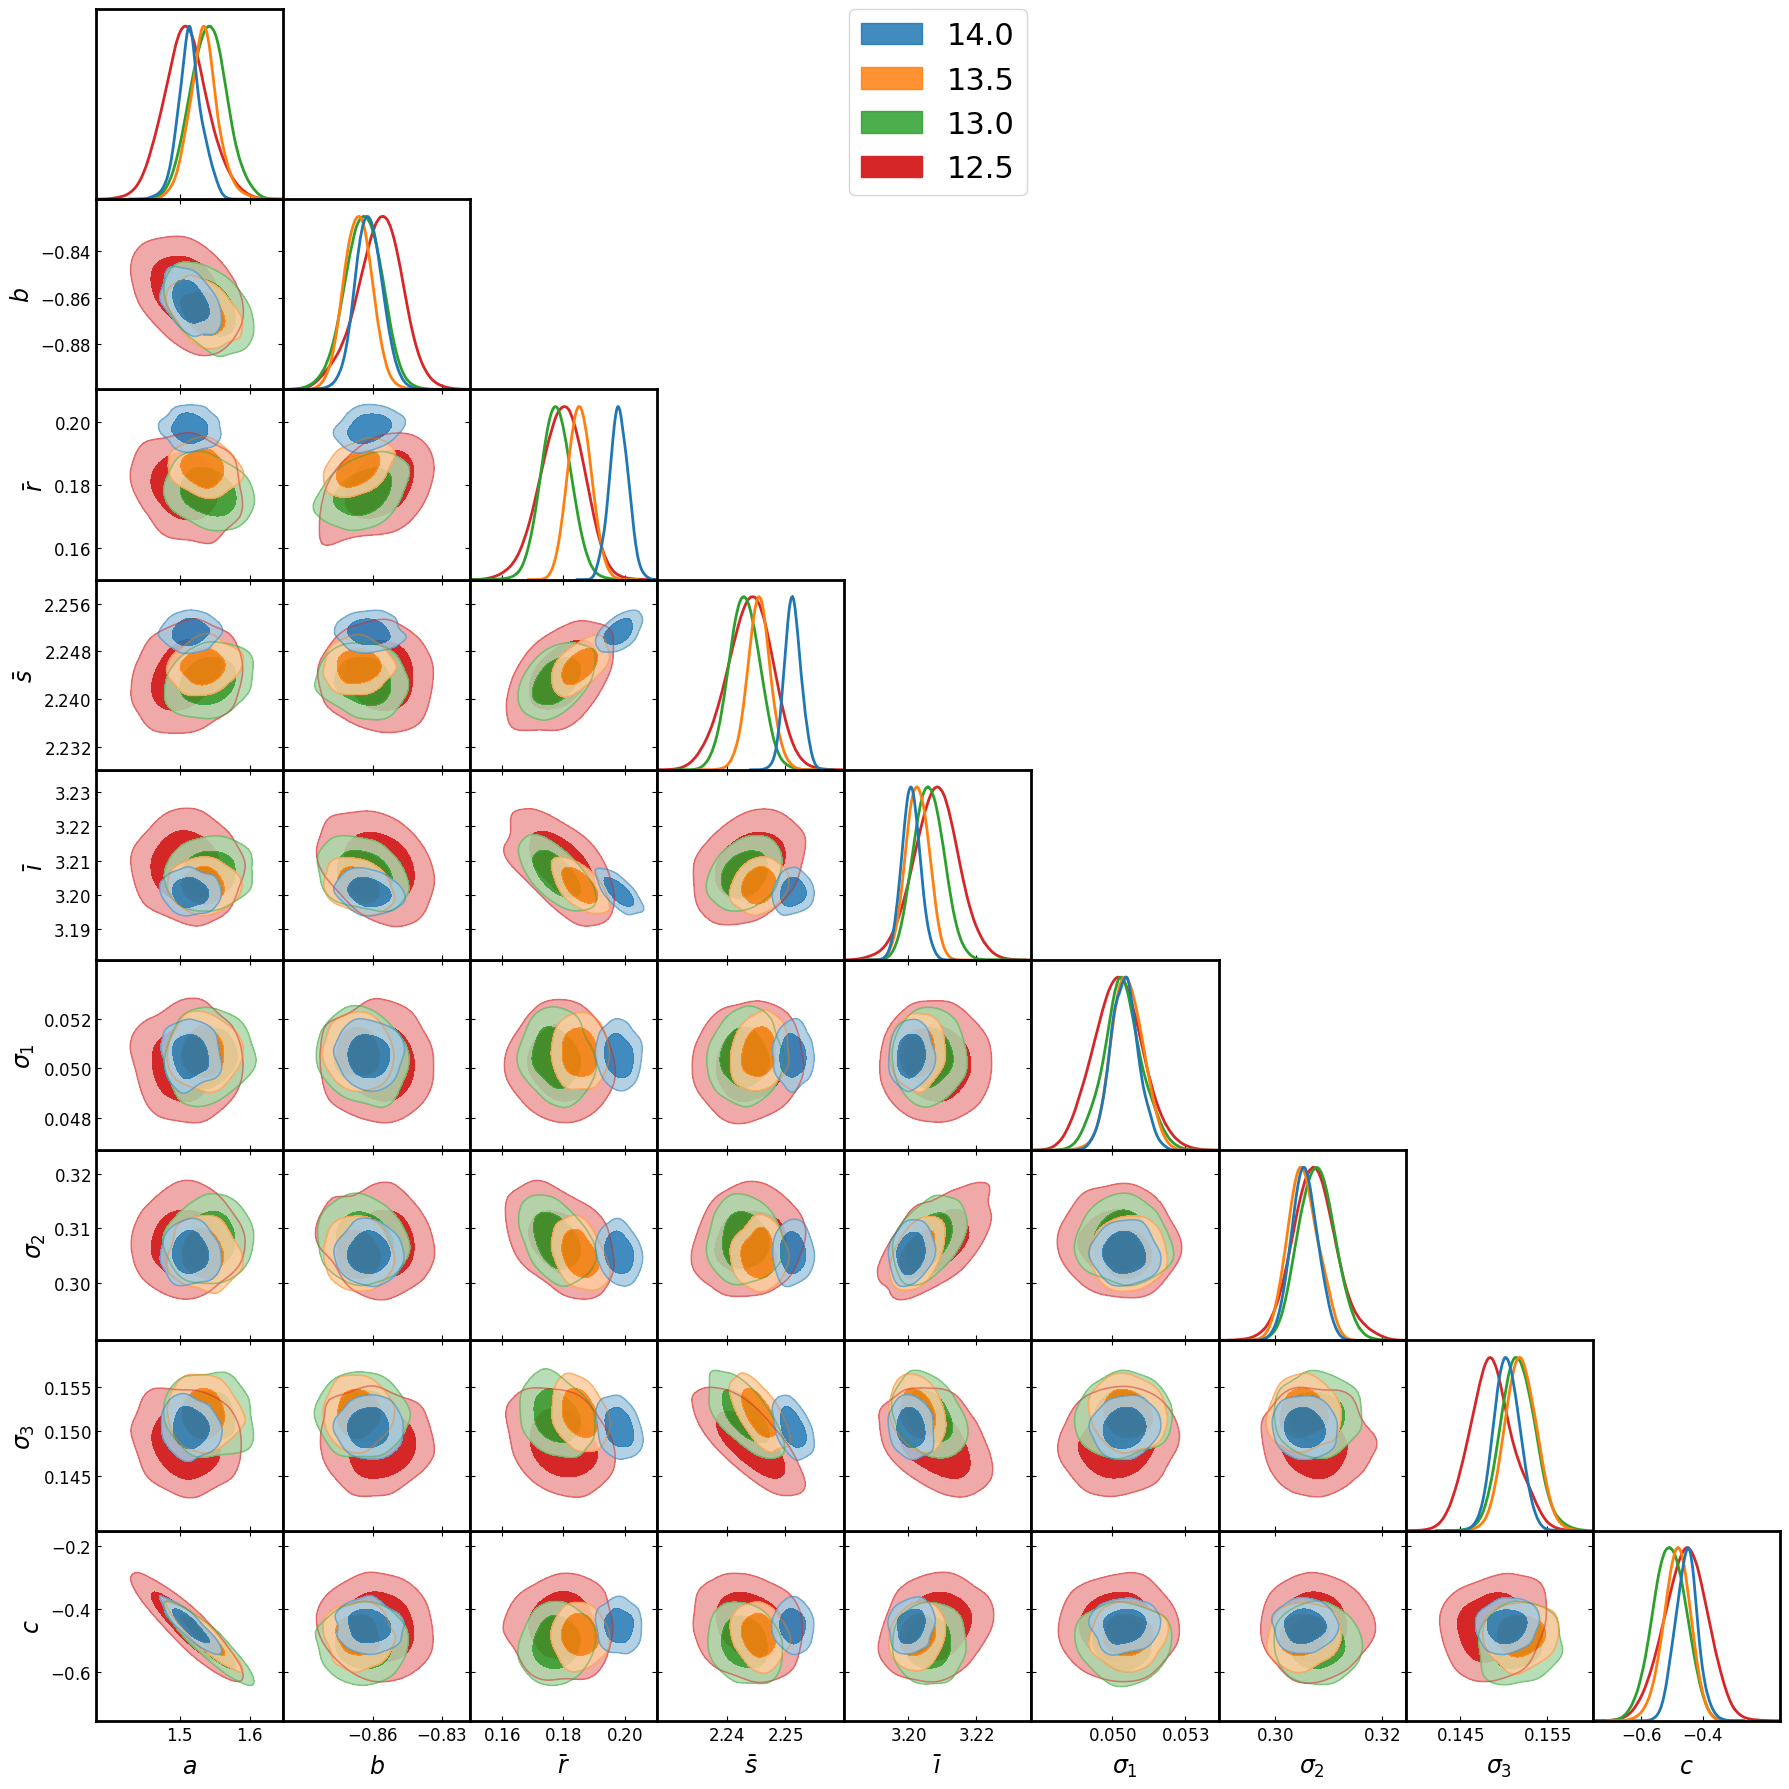

In [19]:
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['font.family'] = 'sans-serif'

# Parameter names
names_list = [r'$a$', r'$b$', r'$\bar{r}$', r'$\bar{s}$', r'$\bar{\imath}$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$', r'$c$']

# magnitudes to plot list
magnitudes_list = ["14.0", "13.5", "13.0", "12.5"]
survey_colours = ["C0", "C1", "C2", "C3", "C4"]

mcmc_chain_list = []
best_fits_list = []
getdist_mcsample_list = []
for i, mag_lim in enumerate(magnitudes_list):
    print(i, mag_lim)

    # Load the likelihood chain
    mcmc_chain = np.load(os.path.join(ROOT_PATH, f"experiments/experiment_014_mock_magnitudes/fp_fits/mock_1/chain_{mag_lim}.npy"))

    # Calculate c
    x = mcmc_chain.T
    y = x[2] - x[0] * x[3] - x[1] * x[4]
    z = np.vstack([x, y])
    mcmc_chain = z.T

    # Append to list
    mcmc_chain_list.append(mcmc_chain)

    # Create getdist object from chain
    label_ = mag_lim
    getdist_mcsample = getdist.MCSamples(samples=mcmc_chain, names=names_list, label=label_)
    getdist_mcsample_list.append(getdist_mcsample)

# Reorder to set the z_order
reorder_list = [3, 2, 1, 0]
survey_colours_reorder = [survey_colours[i] for i in reorder_list]

# Triangle plot
g = getdist.plots.get_subplot_plotter()
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 20
g.triangle_plot(roots=[getdist_mcsample_list[i] for i in reorder_list], filled=True,
                label_order=reorder_list,
                contour_lws=[2] * len(getdist_mcsample_list),
                contour_colors=survey_colours_reorder
                )

# Mock 2

0 14.0
Removed no burn in
1 13.5
Removed no burn in
2 13.0
Removed no burn in
3 12.5
Removed no burn in


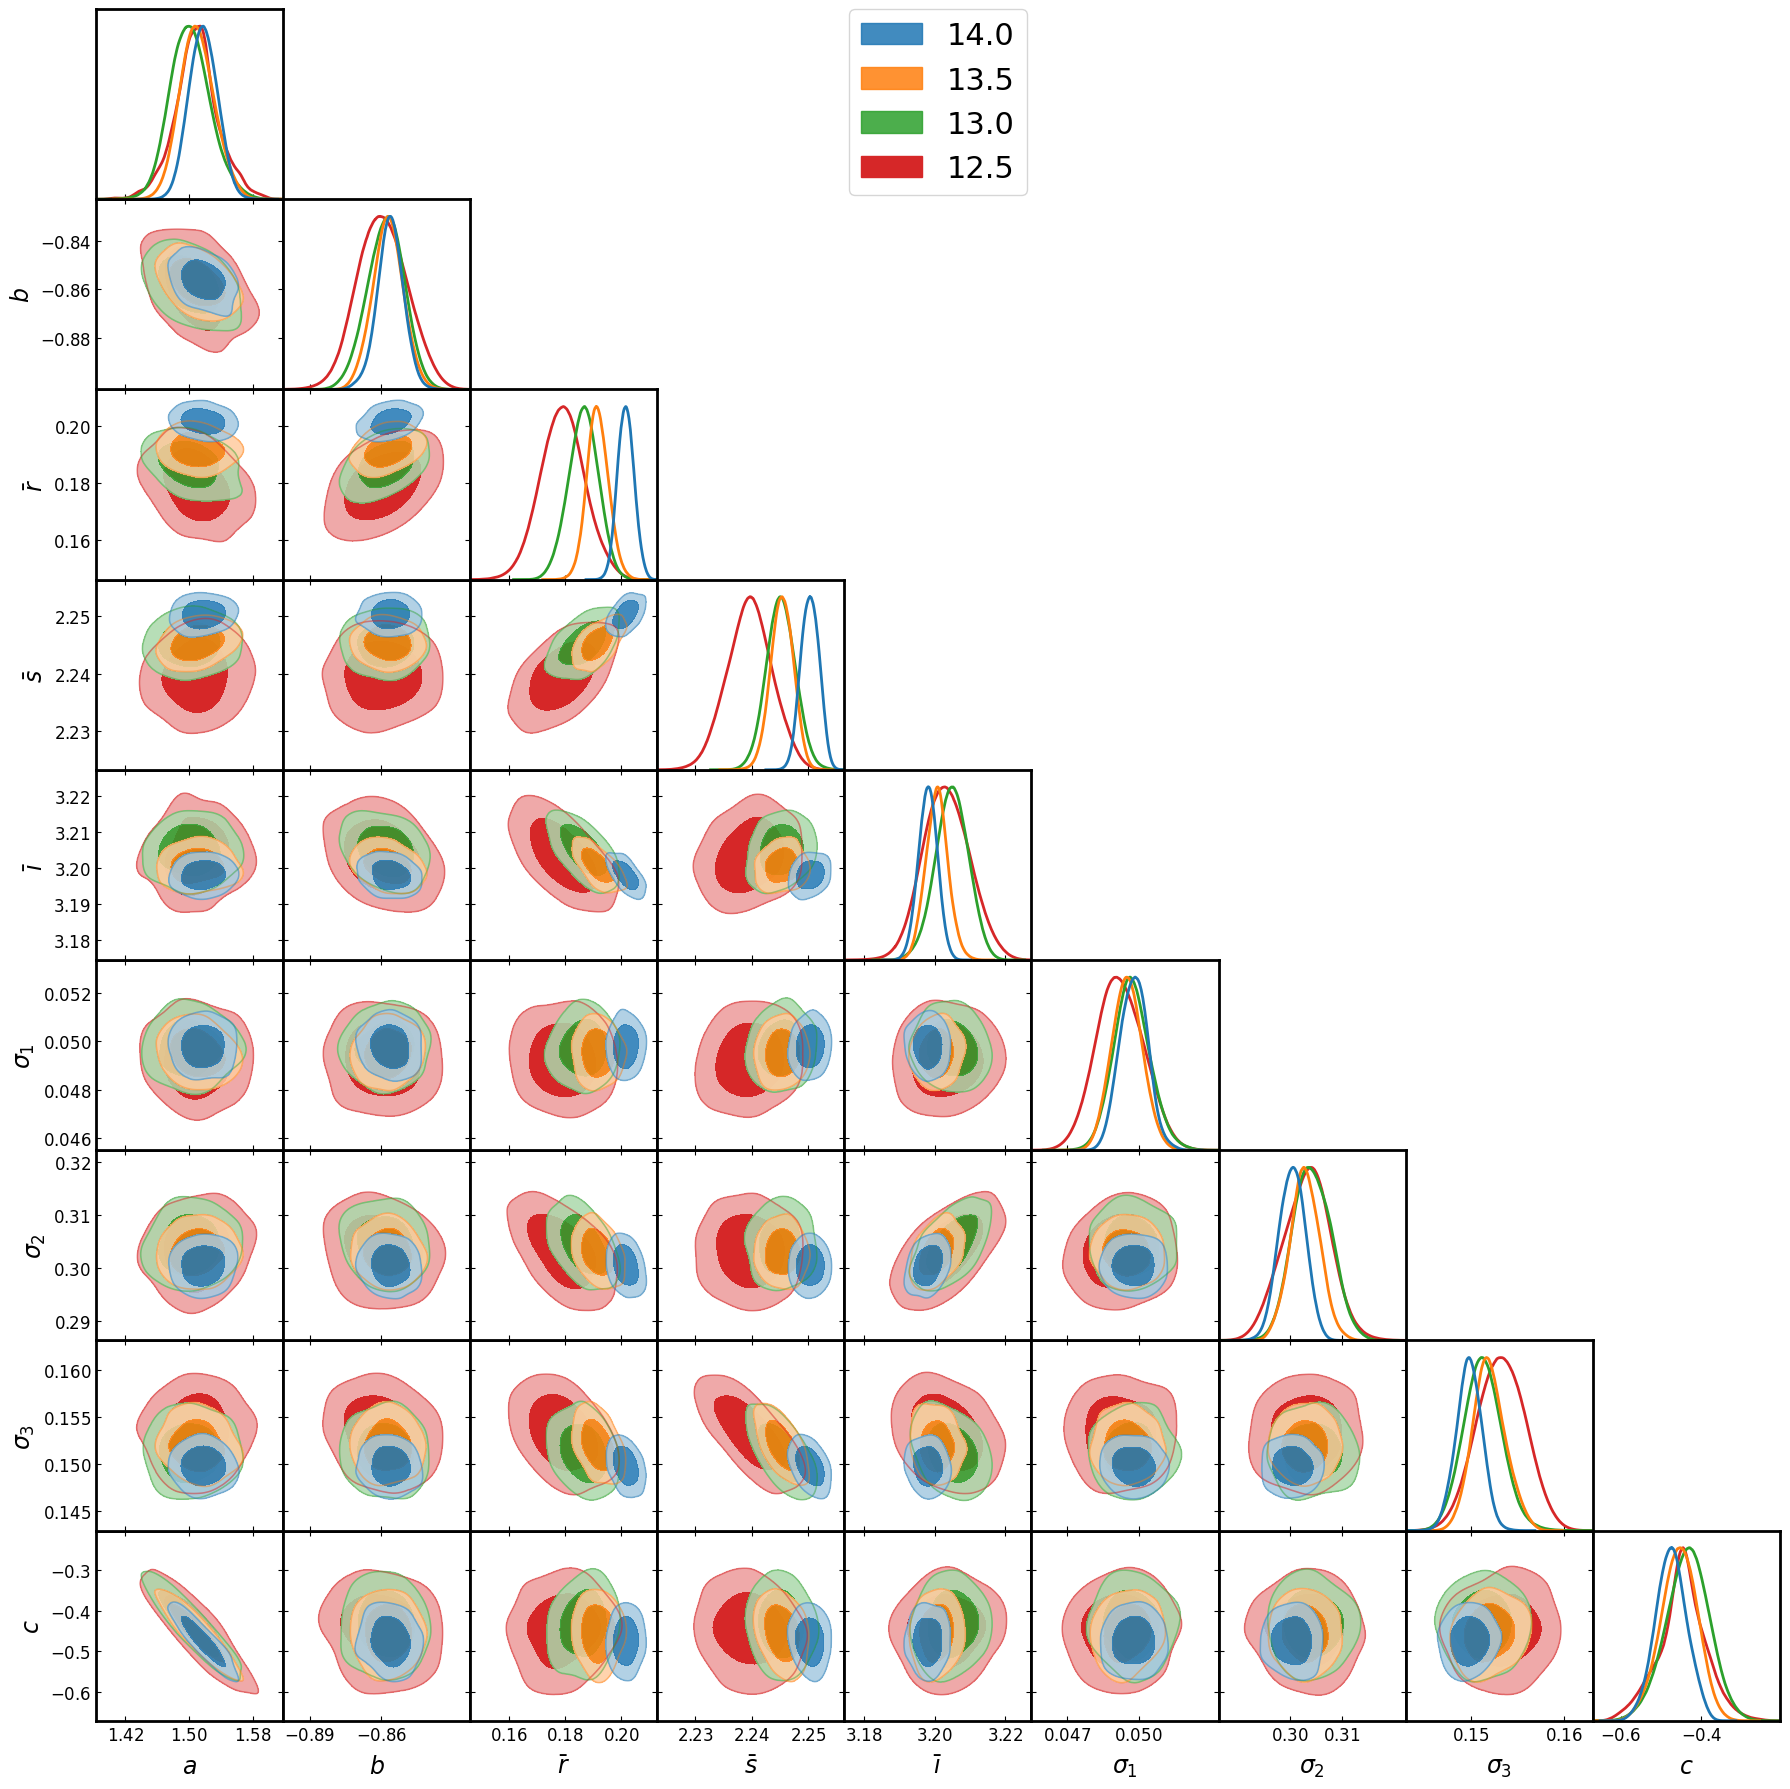

In [20]:
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['font.family'] = 'sans-serif'

# Parameter names
names_list = [r'$a$', r'$b$', r'$\bar{r}$', r'$\bar{s}$', r'$\bar{\imath}$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$', r'$c$']

# magnitudes to plot list
magnitudes_list = ["14.0", "13.5", "13.0", "12.5"]
survey_colours = ["C0", "C1", "C2", "C3", "C4"]

mcmc_chain_list = []
best_fits_list = []
getdist_mcsample_list = []
for i, mag_lim in enumerate(magnitudes_list):
    print(i, mag_lim)

    # Load the likelihood chain
    mcmc_chain = np.load(os.path.join(ROOT_PATH, f"experiments/experiment_014_mock_magnitudes/fp_fits/mock_2/chain_{mag_lim}.npy"))

    # Calculate c
    x = mcmc_chain.T
    y = x[2] - x[0] * x[3] - x[1] * x[4]
    z = np.vstack([x, y])
    mcmc_chain = z.T

    # Append to list
    mcmc_chain_list.append(mcmc_chain)

    # Create getdist object from chain
    label_ = mag_lim
    getdist_mcsample = getdist.MCSamples(samples=mcmc_chain, names=names_list, label=label_)
    getdist_mcsample_list.append(getdist_mcsample)

# Reorder to set the z_order
reorder_list = [3, 2, 1, 0]
survey_colours_reorder = [survey_colours[i] for i in reorder_list]

# Triangle plot
g = getdist.plots.get_subplot_plotter()
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 20
g.triangle_plot(roots=[getdist_mcsample_list[i] for i in reorder_list], filled=True,
                label_order=reorder_list,
                contour_lws=[2] * len(getdist_mcsample_list),
                contour_colors=survey_colours_reorder
                )

# Mock 3

0 14.0
Removed no burn in
1 13.5
Removed no burn in
2 13.0
Removed no burn in
3 12.5
Removed no burn in


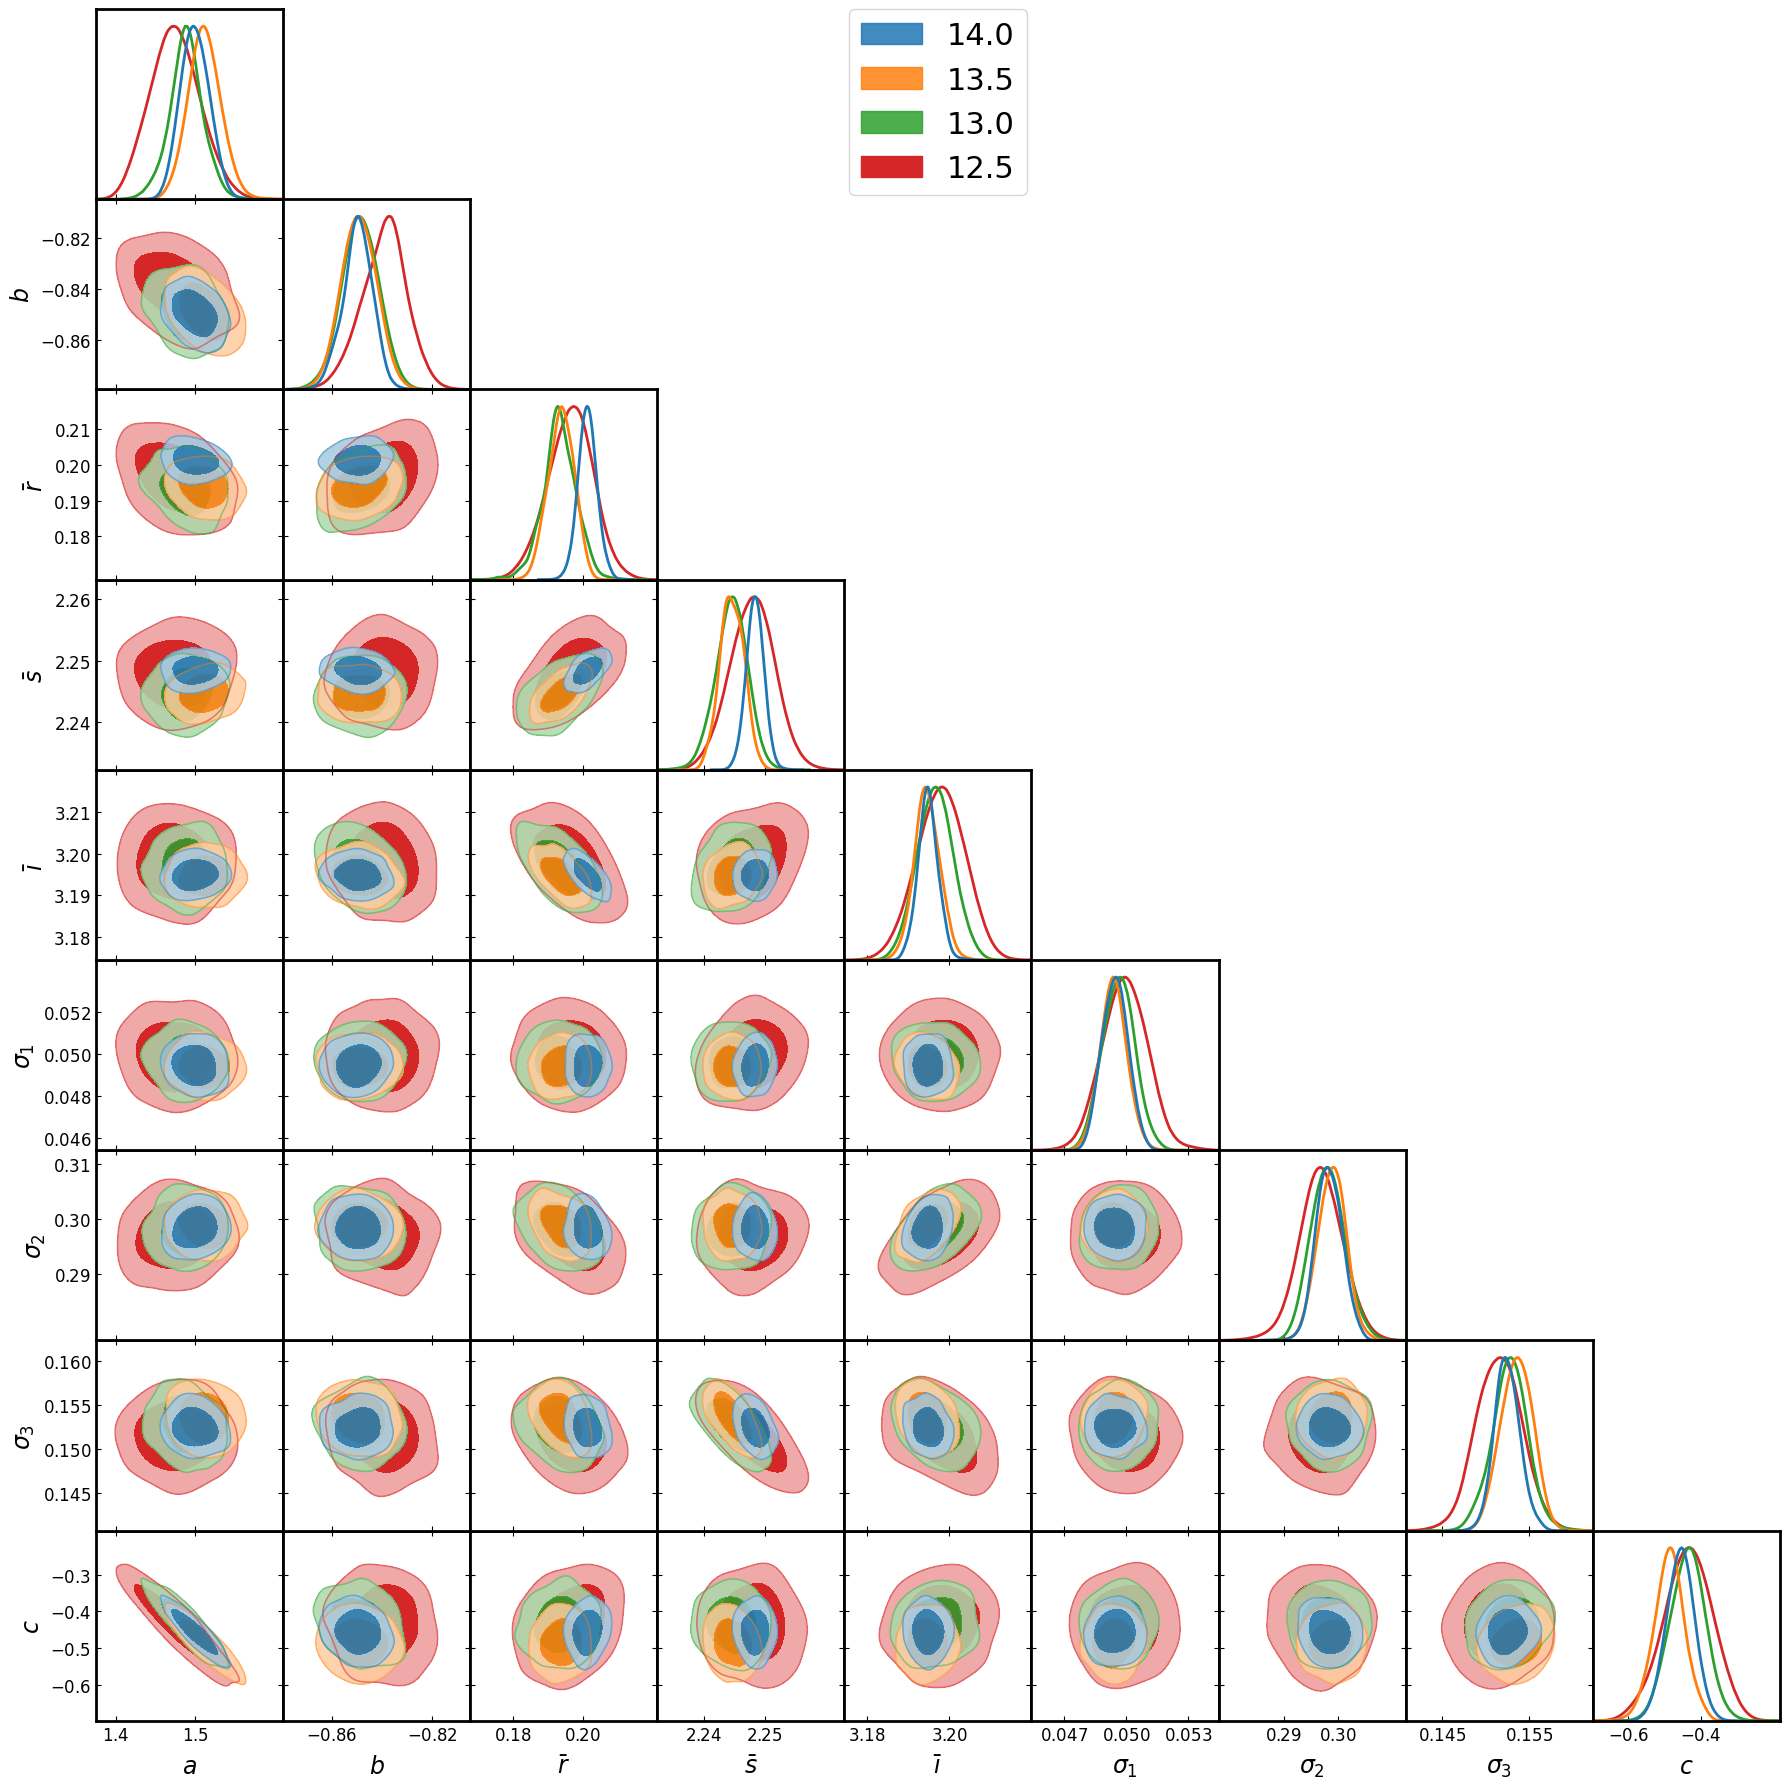

In [21]:
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['font.family'] = 'sans-serif'

# Parameter names
names_list = [r'$a$', r'$b$', r'$\bar{r}$', r'$\bar{s}$', r'$\bar{\imath}$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$', r'$c$']

# magnitudes to plot list
magnitudes_list = ["14.0", "13.5", "13.0", "12.5"]
survey_colours = ["C0", "C1", "C2", "C3", "C4"]

mcmc_chain_list = []
best_fits_list = []
getdist_mcsample_list = []
for i, mag_lim in enumerate(magnitudes_list):
    print(i, mag_lim)

    # Load the likelihood chain
    mcmc_chain = np.load(os.path.join(ROOT_PATH, f"experiments/experiment_014_mock_magnitudes/fp_fits/mock_3/chain_{mag_lim}.npy"))

    # Calculate c
    x = mcmc_chain.T
    y = x[2] - x[0] * x[3] - x[1] * x[4]
    z = np.vstack([x, y])
    mcmc_chain = z.T

    # Append to list
    mcmc_chain_list.append(mcmc_chain)

    # Create getdist object from chain
    label_ = mag_lim
    getdist_mcsample = getdist.MCSamples(samples=mcmc_chain, names=names_list, label=label_)
    getdist_mcsample_list.append(getdist_mcsample)

# Reorder to set the z_order
reorder_list = [3, 2, 1, 0]
survey_colours_reorder = [survey_colours[i] for i in reorder_list]

# Triangle plot
g = getdist.plots.get_subplot_plotter()
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 20
g.triangle_plot(roots=[getdist_mcsample_list[i] for i in reorder_list], filled=True,
                label_order=reorder_list,
                contour_lws=[2] * len(getdist_mcsample_list),
                contour_colors=survey_colours_reorder
                )

# Mock 4

0 14.0
Removed no burn in
1 13.5
Removed no burn in
2 13.0
Removed no burn in
3 12.5
Removed no burn in


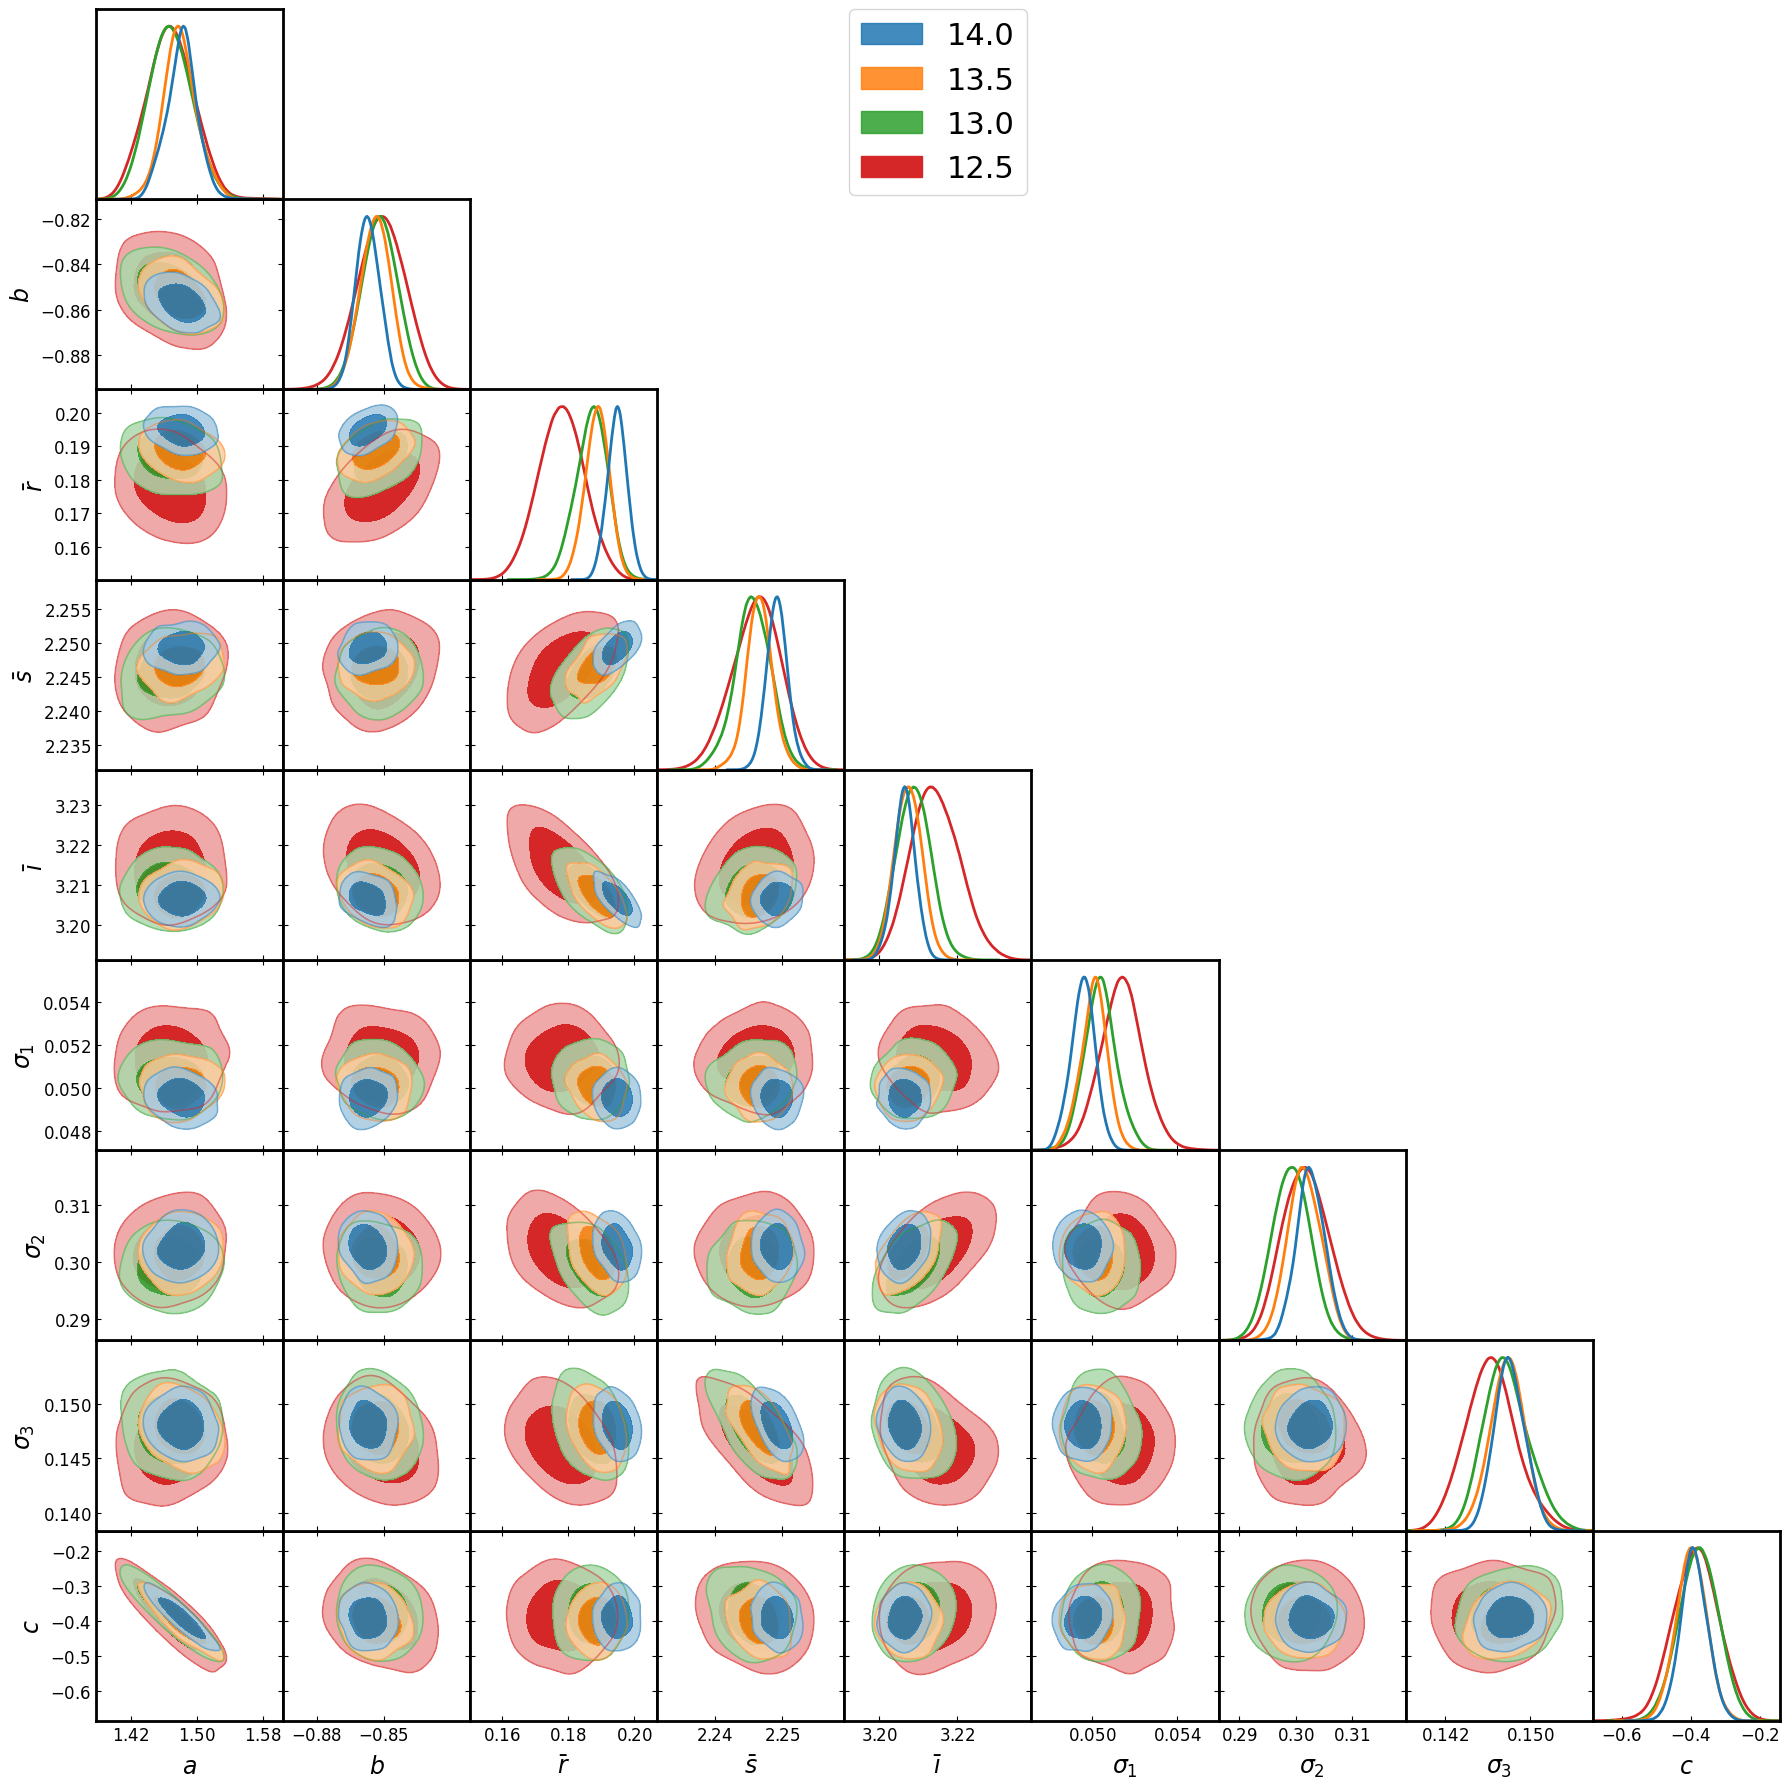

In [22]:
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['font.family'] = 'sans-serif'

# Parameter names
names_list = [r'$a$', r'$b$', r'$\bar{r}$', r'$\bar{s}$', r'$\bar{\imath}$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$', r'$c$']

# magnitudes to plot list
magnitudes_list = ["14.0", "13.5", "13.0", "12.5"]
survey_colours = ["C0", "C1", "C2", "C3", "C4"]

mcmc_chain_list = []
best_fits_list = []
getdist_mcsample_list = []
for i, mag_lim in enumerate(magnitudes_list):
    print(i, mag_lim)

    # Load the likelihood chain
    mcmc_chain = np.load(os.path.join(ROOT_PATH, f"experiments/experiment_014_mock_magnitudes/fp_fits/mock_4/chain_{mag_lim}.npy"))

    # Calculate c
    x = mcmc_chain.T
    y = x[2] - x[0] * x[3] - x[1] * x[4]
    z = np.vstack([x, y])
    mcmc_chain = z.T

    # Append to list
    mcmc_chain_list.append(mcmc_chain)

    # Create getdist object from chain
    label_ = mag_lim
    getdist_mcsample = getdist.MCSamples(samples=mcmc_chain, names=names_list, label=label_)
    getdist_mcsample_list.append(getdist_mcsample)

# Reorder to set the z_order
reorder_list = [3, 2, 1, 0]
survey_colours_reorder = [survey_colours[i] for i in reorder_list]

# Triangle plot
g = getdist.plots.get_subplot_plotter()
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 20
g.triangle_plot(roots=[getdist_mcsample_list[i] for i in reorder_list], filled=True,
                label_order=reorder_list,
                contour_lws=[2] * len(getdist_mcsample_list),
                contour_colors=survey_colours_reorder
                )